<a href="https://colab.research.google.com/github/ThalesCavalcanti/MachineLearningGroundwork/blob/main/Parte_6_1_PyCaret_para_classificac%CC%A7a%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install git+https://github.com/pycaret/pycaret.git@master --upgrade

  Cloning https://github.com/pycaret/pycaret.git (to revision master) to /tmp/pip-req-build-8di0rejg
  Running command git clone --filter=blob:none --quiet https://github.com/pycaret/pycaret.git /tmp/pip-req-build-8di0rejg
  Resolved https://github.com/pycaret/pycaret.git to commit 58ec3c282d58e94727f9d5b77b49f241e9103ab3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import numpy as np

from pycaret.classification import (
    setup,
    compare_models,
    create_model,
    tune_model,
    plot_model,
    evaluate_model,
    predict_model,
    finalize_model,
    save_model,
    load_model
)
from pycaret.datasets import get_data

# PyCaret para Classificação

Neste exercício, você vai escolher outra base de dados do Pycaret para repetir a pipeline de treinamento realizada em aula.

## Base de dados

Recupere todas as bases de dados disponibilizadas pelo Pycaret.

In [4]:
all_bases = get_data('index')


,Dataset,Data Types,Default Task,Target Variable 1,Target Variable 2,# Instances,# Attributes,Missing Values
0,anomaly,Multivariate,Anomaly Detection,NaN,NaN,1000,10,N
1,france,Multivariate,Association Rule Mining,InvoiceNo,Description,8557,8,N
2,germany,Multivariate,Association Rule Mining,InvoiceNo,Description,9495,8,N
3,bank,Multivariate,Classification (Binary),deposit,NaN,45211,17,N
4,blood,Multivariate,Classification (Binary),Class,NaN,748,5,N
5,cancer,Multivariate,Classification (Binary),Class,NaN,683,10,N
6,credit,Multivariate,Classification (Binary),default,NaN,24000,24,N
7,diabetes,Multivariate,Classification (Binary),Class variable,NaN,768,9,N
8,electrical_grid,Multivariate,Classification (Binary),stabf,NaN,10000,14,N
9,employee,Multivariate,Classification (Binary),left,NaN,14999,10,N


Desta vez, vamos utilizar o dataset `questions`, que é um dataset de classificação com mais de duas classes.

Recupere este dataset.

In [5]:
dataset = get_data('questions')

,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question
0,0.483696,0.391304,0.125000,1
1,0.316583,0.286432,0.396985,2
2,0.267176,0.534351,0.198473,1
3,0.521739,0.417391,0.060870,1
4,0.476923,0.446154,0.076923,1


Não existe documentação sobre este dataset, mas podemos inferir pelas colunas que, dada a frequência das categorias 1, 2 e 3, se busca inferir a caegoria da próxima pergunta (`Next_Question`).

Verifique quantas instâncias e quantos atributos este dataset possui.

In [6]:
dataset.shape

(499, 4)

Verifique as categorias (coluna `Next_Question`) e sua respectiva contagem.

In [7]:
np.unique(dataset['Next_Question'], return_counts=True)

(array([1, 2, 3]), array([327, 122,  50]))

Gere uma base de treinamento correspondente a 90% dos dados totais.

In [8]:
base_train = dataset.sample(frac=0.9, random_state=123)
base_train.shape

(449, 4)

Gere a base de testes, correspondente aos dados totais que não estão presentes na base de treinamento.

In [9]:
base_test = dataset.drop(base_train.index)
base_test.shape

(50, 4)

## Configuração do ambiente PyCaret

Gere um experimento, utilizando a base de treinamento.

In [10]:
experiment = setup(data=base_train, target='Next_Question', session_id=1)

,Description,Value
0,Session id,1
1,Target,Next_Question
2,Target type,Multiclass
3,Target mapping,"1: 0, 2: 1, 3: 2"
4,Original data shape,"(449, 4)"
5,Transformed data shape,"(449, 4)"
6,Transformed train set shape,"(314, 4)"
7,Transformed test set shape,"(135, 4)"
8,Numeric features,3
9,Preprocess,True


## Treinamento de vários modelos com validação cruzada

Execute uma comparação de modelos, organizando os resultandos pela coluna `Accuracy`. Solicite 10 folds.

In [11]:
models = compare_models(fold=10, sort='Accuracy')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.7104,0.0000,0.7104,0.6343,0.6547,0.2768,0.3174,0.0280
ridge,Ridge Classifier,0.7069,0.0000,0.7069,0.6241,0.6380,0.2349,0.2882,0.0260
lr,Logistic Regression,0.7036,0.0000,0.7036,0.6201,0.6333,0.2234,0.2771,0.8440
nb,Naive Bayes,0.6878,0.7275,0.6878,0.6173,0.6470,0.2782,0.2925,0.0270
knn,K Neighbors Classifier,0.6719,0.6599,0.6719,0.6037,0.6244,0.2090,0.2325,0.0430
dummy,Dummy Classifier,0.6625,0.5000,0.6625,0.4391,0.5281,0.0000,0.0000,0.0240
gbc,Gradient Boosting Classifier,0.6593,0.0000,0.6593,0.6215,0.6355,0.2439,0.2499,0.3580
lightgbm,Light Gradient Boosting Machine,0.6560,0.6838,0.6560,0.6211,0.6325,0.2503,0.2584,0.8800
ada,Ada Boost Classifier,0.6531,0.0000,0.6531,0.6173,0.6203,0.2047,0.2191,0.1520
rf,Random Forest Classifier,0.6497,0.6761,0.6497,0.6121,0.6261,0.2286,0.2343,0.2450


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

## Tuning dos modelos

Pelos resultados observados, você pode ver que alguns modelos com maior acurácia têm métrica AUC igual a 0. Então, crie um modelo do tipo Naive Bayes, já que é o primeiro modelo na lista com métrica AUC alta.

In [12]:
naive_bayes = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.7348,0.7188,0.6484,0.6812,0.3684,0.3796
1,0.6562,0.7606,0.6562,0.5898,0.6208,0.2281,0.2350
2,0.7188,0.7732,0.7188,0.6416,0.6755,0.3499,0.3669
3,0.6875,0.6765,0.6875,0.6172,0.6500,0.2982,0.3073
4,0.6774,0.7635,0.6774,0.6168,0.6408,0.2010,0.2118
5,0.7097,0.6916,0.7097,0.6194,0.6554,0.3245,0.3502
6,0.6452,0.7236,0.6452,0.5839,0.6130,0.2405,0.2457
7,0.7097,0.6539,0.7097,0.6147,0.6466,0.2377,0.2754
8,0.7097,0.8152,0.7097,0.6784,0.6872,0.3987,0.4103


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Exiba os parâmetros deste modelo.

In [13]:
print(naive_bayes)

GaussianNB(priors=None, var_smoothing=1e-09)


Execute o tuning do modelo.

In [14]:
naive_bayes_tuning = tune_model(naive_bayes)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7188,0.7348,0.7188,0.6484,0.6812,0.3684,0.3796
1,0.6562,0.7606,0.6562,0.5898,0.6208,0.2281,0.2350
2,0.7188,0.7732,0.7188,0.6416,0.6755,0.3499,0.3669
3,0.6875,0.6765,0.6875,0.6172,0.6500,0.2982,0.3073
4,0.6774,0.7635,0.6774,0.6168,0.6408,0.2010,0.2118
5,0.7097,0.6916,0.7097,0.6194,0.6554,0.3245,0.3502
6,0.6452,0.7236,0.6452,0.5839,0.6130,0.2405,0.2457
7,0.7097,0.6539,0.7097,0.6147,0.6466,0.2377,0.2754
8,0.7097,0.8152,0.7097,0.6784,0.6872,0.3987,0.4103


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Exiba os parâmetros do modelo ajustado.

In [15]:
print(naive_bayes_tuning)

GaussianNB(priors=None, var_smoothing=1e-09)


Agora crie um modelo do tipo Light Gradient Boosting Machine.

In [16]:
lightgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5938,0.6069,0.5938,0.5730,0.5797,0.1891,0.1917
1,0.6250,0.6939,0.6250,0.6023,0.6134,0.2195,0.2201
2,0.7188,0.7443,0.7188,0.6736,0.6719,0.3175,0.3559
3,0.6875,0.6310,0.6875,0.6296,0.6460,0.2644,0.2838
4,0.7419,0.8352,0.7419,0.7155,0.7284,0.4273,0.4287
5,0.6129,0.5929,0.6129,0.5430,0.5723,0.1349,0.1407
6,0.6452,0.6737,0.6452,0.6308,0.6376,0.2940,0.2946
7,0.6452,0.6680,0.6452,0.6006,0.6123,0.1517,0.1596
8,0.6774,0.7671,0.6774,0.6416,0.6573,0.3172,0.3201


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Exiba os parâmetros do modelo.

In [17]:
print(lightgbm)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


Faça o tuning do modelo, investindo o número de estimadores (`n_estimators`) no intervalo 50 a 100, com passos de 10.

In [18]:
lightgbm_tuning = tune_model(lightgbm, custom_grid = {'n_neighbors' : np.arange(50, 101, 10)})

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5938,0.6069,0.5938,0.5730,0.5797,0.1891,0.1917
1,0.6250,0.6939,0.6250,0.6023,0.6134,0.2195,0.2201
2,0.7188,0.7443,0.7188,0.6736,0.6719,0.3175,0.3559
3,0.6875,0.6310,0.6875,0.6296,0.6460,0.2644,0.2838
4,0.7419,0.8352,0.7419,0.7155,0.7284,0.4273,0.4287
5,0.6129,0.5929,0.6129,0.5430,0.5723,0.1349,0.1407
6,0.6452,0.6737,0.6452,0.6308,0.6376,0.2940,0.2946
7,0.6452,0.6680,0.6452,0.6006,0.6123,0.1517,0.1596
8,0.6774,0.7671,0.6774,0.6416,0.6573,0.3172,0.3201


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 6 candidates, totalling 60 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Exiba os parâmetros do modelo ajustado.

In [19]:
print(lightgbm_tuning)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=1, reg_alpha=0.0, reg_lambda=0.0, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)


## Gráficos

Exiba um gráfico da matriz de confusão do modelo Naive Bayes ajustado por tuning de parâmetros.

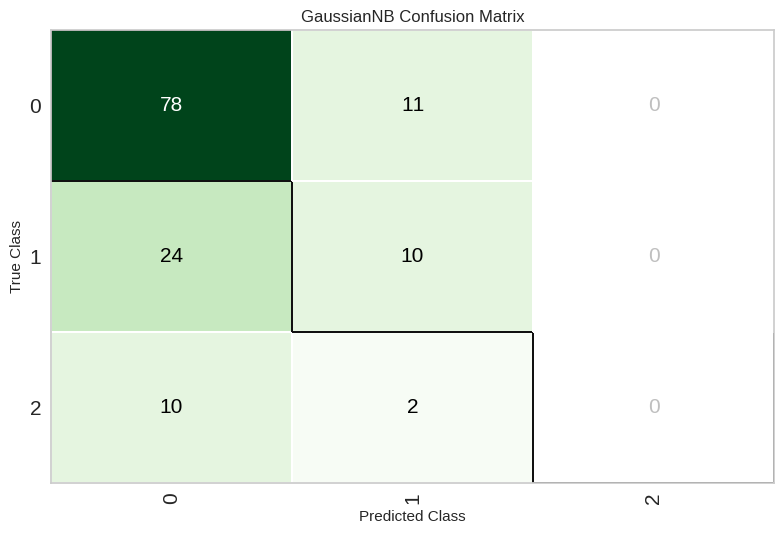

In [20]:
plot_model(naive_bayes_tuning, plot='confusion_matrix')

Agora exiba um gráfico do reporte por classe.

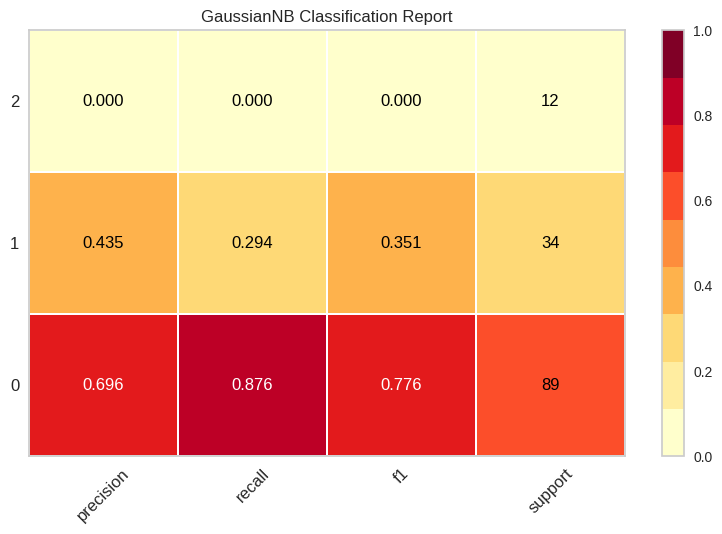

In [21]:
plot_model(naive_bayes_tuning, plot='class_report')

Exiba um gráfico do tipo fronteira (boundary).

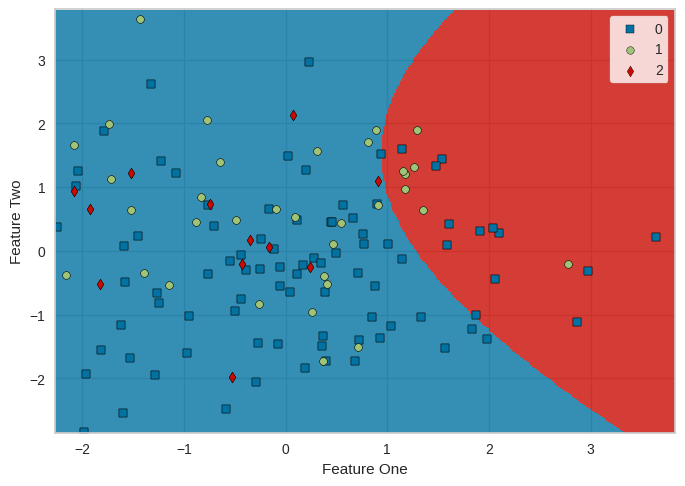

In [22]:
plot_model(naive_bayes_tuning, plot='boundary')

Exiba um gráfico com os erros do algoritmo.

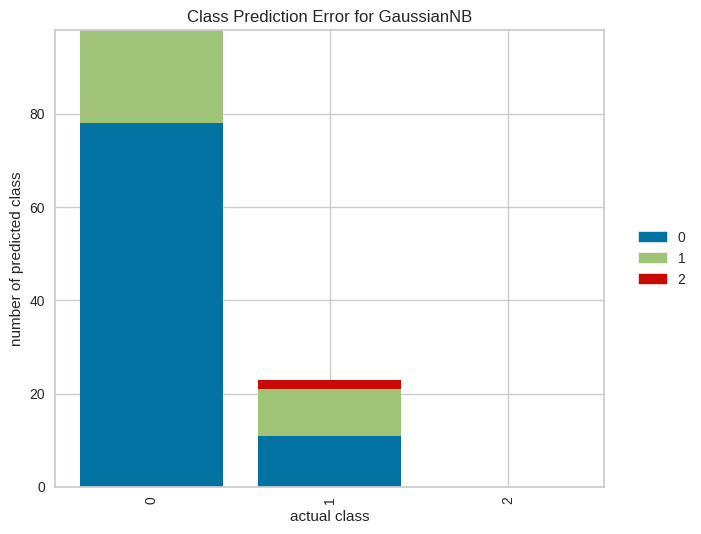

In [23]:
plot_model(naive_bayes_tuning, plot='error')

Exiba a avaliação do modelo.

In [24]:
evaluate_model(naive_bayes_tuning)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Previsões com o modelo

Execute as previsões do modelo.

In [25]:
predict_model(naive_bayes_tuning)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.6519,0,0.6519,0.5686,0.6000,0.1512,0.1659


,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question,prediction_label,prediction_score
179,0.538462,0.051282,0.410256,1,2,0.5057
43,0.477987,0.069182,0.452830,1,2,0.5659
71,0.317829,0.360465,0.321705,3,1,0.7046
35,0.293706,0.475524,0.230769,1,1,0.8459
359,0.398190,0.262443,0.339367,1,1,0.6515
...,...,...,...,...,...,...
119,0.413146,0.253521,0.333333,2,1,0.6588
385,0.319149,0.000000,0.680851,1,2,0.8651
1,0.316583,0.286432,0.396985,2,1,0.5599
100,0.292308,0.420513,0.287179,1,1,0.7689


Crie uma versão final do modelo ajustado por tuning de hiperparâmetros.

In [26]:
naive_bayes_final = finalize_model(naive_bayes_tuning)
print(naive_bayes_final)

Pipeline(memory=Memory(location=None),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['CAT_1_Freq', 'CAT_2_Freq',
                                             'CAT_3_Freq'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=nan,
                                                              strategy='mean'))),
                ('categorical_imputer',
                 Transfor

Salve este modelo.

In [27]:
save_model(naive_bayes_final, 'naive_bayes_final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['CAT_1_Freq', 'CAT_2_Freq',
                                              'CAT_3_Freq'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=nan,
                                                               strategy='mean'))),
                 ('categorical_imputer',
          

Recarregue o modelo salvo.

In [28]:
naive_bayes_loaded = load_model('naive_bayes_final')

Transformation Pipeline and Model Successfully Loaded


Faça previsões com o modelo recarregado na base de testes.

In [29]:
prevision = predict_model(naive_bayes_loaded, data=base_test)
prevision

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Naive Bayes,0.5200,0,0.5200,0.4432,0.4777,0.0798,0.0843


,CAT_1_Freq,CAT_2_Freq,CAT_3_Freq,Next_Question,prediction_label,prediction_score
2,0.267176,0.534351,0.198473,1,1,0.8704
17,0.303030,0.206061,0.490909,1,2,0.5022
32,0.297297,0.175676,0.527027,1,2,0.5769
39,0.224490,0.387755,0.387755,1,1,0.5769
47,0.127820,0.699248,0.172932,2,1,0.9433
57,0.222222,0.314815,0.462963,2,1,0.4284
68,0.113772,0.311377,0.574850,3,2,0.4581
73,0.117647,0.661765,0.220588,1,1,0.9094
83,0.320197,0.487685,0.192118,1,1,0.8650
84,0.464052,0.117647,0.418301,1,2,0.4829
